# **Tugas 2 Laboratorium Probabilitas dan Statistika - Data Preprocessing & EDA (Part 1)**
__(Ananda Kelvin P. S. / 221401065)__

***

# Menganalisis Headline Berita detikcom Tahun 2020 Semester I

***

 ## Import Library & Class

> ### Import Library

1. Mengimport library __pandas__ dan memberikan alias __pd__ agar lebih mudah digunakan saat memanggil fungsi atau objek dari library pandas

2. Mengimport library __matplotlib.pyplot__ dan memberikan alias __plt__ agar lebih mudah digunakan dalam memvisualisasi data

3. Mengimport library __nltk__ yang merupakan singkatan dari Natural Language Toolkit. Library ini digunakan untuk memproses bahasa alami, seperti tokenisasi, stemming, dan part-of-speech tagging

4. Mengimport library __re__ yang merupakan singkatan dari Regular Expression. Library ini digunakan untuk memanipulasi teks dengan menggunakan ekspresi reguler

5. Mengimport library __seaborn__ dan memberikan alias __sns__ agar lebih mudah digunakan untuk membuat visualisasi data yang lebih kompleks dan informatif, seperti heatmap, pairplot, dan distribution plot

6. Mengimport library __numpy__ dan memberikan alias __np__ . Library tersebut akan digunakan untuk melakukan operasi numerik dan membuat garis bantu pada grafik data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
import numpy as np

> ### Import Class

1. Mengimport class __Counter__ dari library __collections__. Class Counter digunakan untuk menghitung jumlah kemunculan setiap elemen dalam sebuah list

2.  Mengimport __corpus stopwords__ dari library __nltk__. Corpus stopwords berisi daftar kata-kata yang biasanya diabaikan dalam analisis teks karena kata-kata tersebut memiliki makna umum dan tidak relevan dalam menganalisis teks

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

***

 ## Load Dataset

In [ ]:
df = pd.read_csv('detik-news-title.csv')

df

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
...,...,...,...,...
91012,02/03/2020,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel
91013,02/03/2020,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel
91014,02/03/2020,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel
91015,02/03/2020,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel


***

## Data Preprocessing

 ### Data Wrangling

 * #### Mengubah Format Tanggal

> Pada dataset, kolom 'date' sedikit sulit dibaca karena tanggal ditulis dalam format MM/DD/YYYY di mana format ini digunakan di US, berbeda dengan format di Indonesia yang menggunakan DD/MM/YYYY. Solusinya adalah mengambil jalan tengah dengan mengubah menjadi format standar ISO 8601 (YYYY-MM-DD) menggunakan regex untuk konsistensi dan kemudahan penggunaan.

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

df

,date,url,title,category
0,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,2020-02-26,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
...,...,...,...,...
91012,2020-02-03,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel
91013,2020-02-03,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel
91014,2020-02-03,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel
91015,2020-02-03,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel


* #### Menghitung Panjang Judul

> Menghitung panjang judul (jumlah karakter) dan menambahkannya sebagai kolom baru dalam dataset sehingga bisa membantu menganalisis distribusi panjang judul dalam dataset.

In [ ]:
df['title_length'] = df['title'].apply(lambda x: len(x))

df

,date,url,title,category,title_length
0,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance,30
1,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance,33
2,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,63
3,2020-02-26,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,53
4,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,52
...,...,...,...,...,...
91012,2020-02-03,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel,58
91013,2020-02-03,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel,56
91014,2020-02-03,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel,60
91015,2020-02-03,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel,58


***

 ### Data Cleaning

* #### Menghapus kolom yang tidak diperlukan

Kolom _url_ akan dihapus karena tidak akan dibutuhkan. Seluruh sumber berita terdapat pada situs yang sama yaitu detik.com

In [ ]:
df.drop('url', axis=1, inplace=True)

df

,date,title,category,title_length
0,2020-02-26,Kemnaker Awasi TKA di Meikarta,finance,30
1,2020-02-26,BNI Digitalkan BNI Java Jazz 2020,finance,33
2,2020-02-26,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,63
3,2020-02-26,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,53
4,2020-02-26,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,52
...,...,...,...,...
91012,2020-02-03,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel,58
91013,2020-02-03,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel,56
91014,2020-02-03,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel,60
91015,2020-02-03,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel,58


 * ####          Menghapus Baris Duplikat

> Mengecek seluruh judul artikel apakah terdapat baris ganda, atau dengan judul yang sama namun memiliki kategori/tanggal yang berbeda

In [ ]:
df[df['title'].duplicated(keep=False)].sort_values(by='title')

,date,title,category,title_length
36982,2020-04-24,'The Expendables 3' dan 'A Good Man' Tayang di...,hot,63
36985,2020-04-24,'The Expendables 3' dan 'A Good Man' Tayang di...,hot,63
55232,2020-03-06,"1 WNI ABK Diamond Princess Dicurigai COVID-19,...",news,75
18763,2020-03-06,"1 WNI ABK Diamond Princess Dicurigai COVID-19,...",health,75
70942,2020-03-04,11 Orang Kontak Langsung dengan WN Jepang di B...,news,64
...,...,...,...,...
42649,2020-03-11,"Unboxing vivo V19, Unggulkan Ultra O Screen de...",inet,70
85499,2020-01-06,"Viral, Penumpang 'Ditahan' Gara-gara Hina Garu...",travel,58
4402,2020-01-06,"Viral, Penumpang 'Ditahan' Gara-gara Hina Garu...",finance,58
80996,2020-01-29,"Yamaha Buka Banyak Lowongan, Lulusan SMA Bisa ...",oto,52


> Membersihkan seluruh judul ganda

In [ ]:
df.drop_duplicates(subset=['title'],inplace=True)

df

,date,title,category,title_length
0,2020-02-26,Kemnaker Awasi TKA di Meikarta,finance,30
1,2020-02-26,BNI Digitalkan BNI Java Jazz 2020,finance,33
2,2020-02-26,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,63
3,2020-02-26,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,53
4,2020-02-26,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,52
...,...,...,...,...
91012,2020-02-03,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel,58
91013,2020-02-03,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel,56
91014,2020-02-03,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel,60
91015,2020-02-03,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel,58


* #### Mengecek Seluruh Kolom Apakah Ada Data yang Kosong

In [ ]:
print(df.isna().any())

date            False
title           False
category        False
title_length    False
dtype: bool


> Tidak data yang kosong pada seluruh kolom. Dataset ini terlihat cukup bagus karena hanya mempunyai sedikit masalah pada duplikasi judul

* #### Membersihkan Seluruh Judul dengan Menghilangkan Seluruh Karakter yang Tidak Berguna

> Terdapat banyak karakter tidak berguna yang ada pada kolom title. Menggunakan regex untuk membersihkan angka dan simbol agar nanti data lebih mudah diolah saat dianalisis. Judul yang sudah dibersihkan sementara akan disimpan pada kolom baru

In [ ]:
df['title_clean'] = df['title'].str.replace('[^a-zA-Z\s]', '',regex = True)
df['title_clean'] = df['title_clean'].str.lower()

df

,date,title,category,title_length,title_clean
0,2020-02-26,Kemnaker Awasi TKA di Meikarta,finance,30,kemnaker awasi tka di meikarta
1,2020-02-26,BNI Digitalkan BNI Java Jazz 2020,finance,33,bni digitalkan bni java jazz
2,2020-02-26,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,63,terbang ke australia edhy prabowo mau genjot b...
3,2020-02-26,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,53,ojk siapkan stimulus ekonomi antisipasi dampak...
4,2020-02-26,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,52,saran buat aniesrk yang mangkir rapat banjir d...
...,...,...,...,...,...
91012,2020-02-03,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel,58,ketumpahan air panas di pesawat kamu bisa tunt...
91013,2020-02-03,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel,56,foto bali destinasi paling instagramable tahun
91014,2020-02-03,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel,60,game bikin turis ini liburan ke jepang untuk c...
91015,2020-02-03,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel,58,sekeluarga didepak dari pesawat maskapai bilan...


* #### Membuat Token dari Judul yang Telah Dibersihkan

> Judul yang kita sudah bersihkan kita ubah menjadi token (unit terkecil dari teks) untuk diambil sebagai satuan analisis teks.

In [ ]:
df['title_tokens'] = df['title_clean'].apply(lambda x: x.split())
df.drop('title_clean', axis=1, inplace=True)

df

,date,title,category,title_length,title_tokens
0,2020-02-26,Kemnaker Awasi TKA di Meikarta,finance,30,"[kemnaker, awasi, tka, di, meikarta]"
1,2020-02-26,BNI Digitalkan BNI Java Jazz 2020,finance,33,"[bni, digitalkan, bni, java, jazz]"
2,2020-02-26,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,63,"[terbang, ke, australia, edhy, prabowo, mau, g..."
3,2020-02-26,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,53,"[ojk, siapkan, stimulus, ekonomi, antisipasi, ..."
4,2020-02-26,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,52,"[saran, buat, aniesrk, yang, mangkir, rapat, b..."
...,...,...,...,...,...
91012,2020-02-03,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel,58,"[ketumpahan, air, panas, di, pesawat, kamu, bi..."
91013,2020-02-03,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel,56,"[foto, bali, destinasi, paling, instagramable,..."
91014,2020-02-03,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel,60,"[game, bikin, turis, ini, liburan, ke, jepang,..."
91015,2020-02-03,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel,58,"[sekeluarga, didepak, dari, pesawat, maskapai,..."


***

## Exploratory Data Analysis

 * ### Kategori Berita

> Menghitung frekuensi jumlah artikel perkategori

In [ ]:
category_counts = df['category'].value_counts()
print(category_counts)

news       32330
hot        16300
finance    14141
travel      6454
inet        5629
health      4914
oto         4375
food        4314
sport       2434
Name: category, dtype: int64


 > Di sini saya memilih grafik pie, karena untuk memperjelas bagaimana perbandingan kategori terhadap kategori yang lainnya.

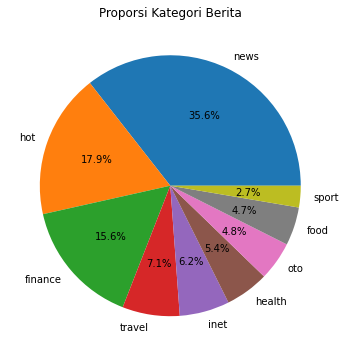

In [ ]:
plt.figure(figsize=(12, 6))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Proporsi Kategori Berita')
plt.show()

***

 * ### Menganalisa Panjang Judul

#### Menganalisa Panjang Judul untuk Keseluruhan Kategori

> Menghitung statistik untuk panjang judul keseluruhan artikel

In [ ]:
title_lengths = df['title_length']
print(title_lengths.describe())

count    90891.000000
mean        60.375692
std         11.141248
min          4.000000
25%         53.000000
50%         62.000000
75%         69.000000
max        107.000000
Name: title_length, dtype: float64


> Membuat histogram panjang judul

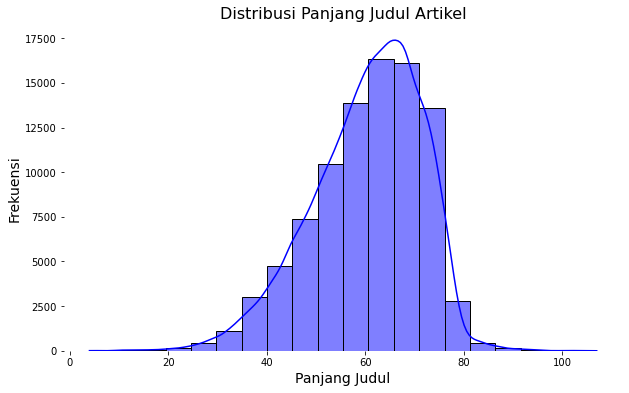

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=title_lengths, bins=20, edgecolor='black', kde=True, color='blue')
plt.xlabel('Panjang Judul', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.title('Distribusi Panjang Judul Artikel', fontsize=16)
sns.despine(left=True, bottom=True)
plt.show()


***

#### Menganalisa Panjang Judul pada Setiap Kategori

> Menganalisis hubungan antara kategori dan panjang judul

In [ ]:
category_title_length = df.groupby('category')['title_length'].mean()
print(category_title_length)


category
finance    54.496005
food       66.313862
health     63.876068
hot        59.446012
inet       52.535086
news       65.726972
oto        57.178743
sport      54.800329
travel     53.273939
Name: title_length, dtype: float64


> Membuat grafik untuk hubungan frekuensi panjang judul dan kategori. Dan juga menambahkan garis bantu untuk setiap y kelipatan 10 agar setiap bar mudah di bandingkan satu sama lain

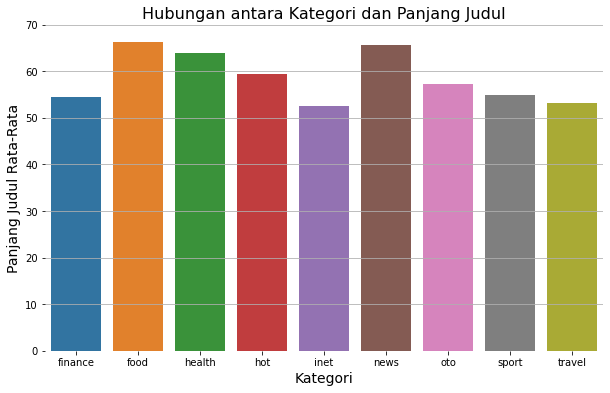

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_title_length.index, y=category_title_length.values)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Panjang Judul Rata-Rata', fontsize=14)
plt.title('Hubungan antara Kategori dan Panjang Judul', fontsize=16)

sns.despine(left=True, bottom=True)

#Membuat garis bantu
plt.yticks(np.arange(0, 75, 10))
plt.grid(axis='y', linestyle='-')

plt.show()


***

* ### Frekuensi Kata Terbanyak pada Judul

 #### Menganalisa kata terbanyak untuk keseluruhan judul

> Mengambil 10 kata terbanyak yang muncul. Menggunakan fungsi _stopwords_ pada library __nltk__ untuk menyaring kata-kata penghubung yang sering muncul dan tidak dibutuhkan

In [ ]:
sw_indo = set(stopwords.words('indonesian'))

word_freq = Counter()
for tokens in df['title_tokens']:
    word_freq.update(tokens)

for sw in sw_indo:
    word_freq.pop(sw, None)

top_words = word_freq.most_common(10)
print(top_words)

[('corona', 17198), ('rp', 3154), ('virus', 3070), ('polisi', 2706), ('positif', 2680), ('warga', 2475), ('indonesia', 2465), ('rumah', 2428), ('jokowi', 2275), ('ri', 2147)]


> Menggunakan diagram pareto untuk memvisualisasikan kata terbanyak

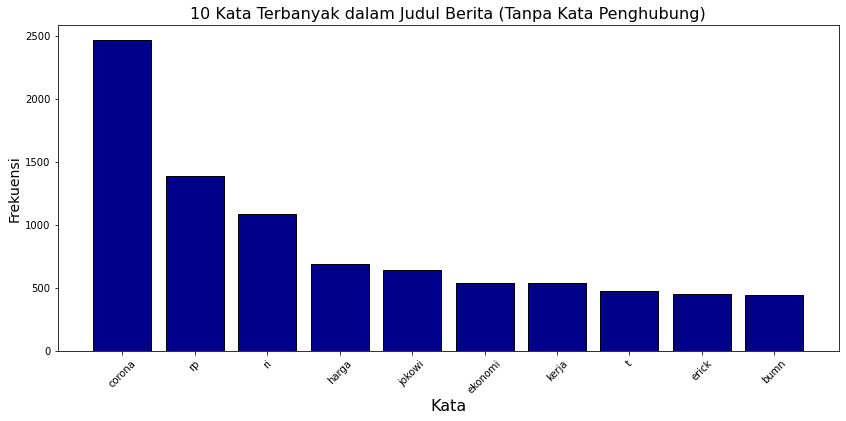

In [ ]:
# Membuat grafik
top_words_labels, top_words_values = zip(*top_words)
plt.figure(figsize=(14, 6))
plt.bar(top_words_labels, top_words_values,color = "darkblue" ,edgecolor ="black")

# Menambahkan label dan judul
plt.xlabel('Kata', fontsize=16)
plt.ylabel('Frekuensi', fontsize=14)
plt.title('10 Kata Terbanyak dalam Judul Berita (Tanpa Kata Penghubung)', fontsize=16)

# Memutar label pada sumbu x
plt.xticks(rotation=45)

# Menampilkan grafik
plt.show()


***

 #### Menganalisa kata terbanyak pada setiap kategori

> Terdapat 9 kategori pada dataset tersebut. Kata terbanyak akan ditampilkan begitu juga grafiknya. Menggunakan kode berulang-ulang yang hampir sama pada setiap sel yang berbeda tidak akan efisien, atau juga menampilkan keseluruhan grafik dalam satu sel akan sulit untuk dibaca. Maka membuat fungsi dan memanggilnya berkali-kali pada sel yang berbeda untuk ditampilkan akan lebih mudah dibaca dan lebih efisien.

In [ ]:
# Fungsi untuk mengambil terbanyak dari setiap kategorinya tanpa kata penghubung
def top_words_per_category(df, category, sw_indo, n_top_words=10):
    df_category = df[df['category'] == category]

    word_freq = Counter()
    for tokens in df_category['title_tokens']:
        word_freq.update(tokens)

    for sw in sw_indo:
        word_freq.pop(sw, None)

    top_words = word_freq.most_common(n_top_words)
    return top_words

# Fungsi untuk menggambarkan grafik frekuensi kata terbanyak per kategori
def plot_top_words(top_words, category):
    words, freqs = zip(*top_words)
    words = list(map(str, words))  # Konversi tipe data menjadi string
    freqs = list(map(int, freqs))  # Konversi tipe data menjadi integer

    #Pembuatan grafik untuk setiap kategori
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=words)
    plt.xlabel('Frekuensi', fontsize=14)
    plt.ylabel('Kata', fontsize=14)
    plt.title(f'Frekuensi Kata Terbanyak dalam Kategori {category}', fontsize=16)
    sns.despine(left=True, bottom=True)
    plt.show()

# Menghitung frekuensi kata terbanyak per kategori
sw_indo = set(stopwords.words('indonesian'))
categories = df['category'].unique()


> Selanjutnya untuk menampilkan bar chart pada setiap kategori, kita hanya perlu mengganti index-nya dari 0-8 (9 indeks) pada "categories[i]". Urutan pemanggilan sesuai index berurut dengan huruf pertama kategori

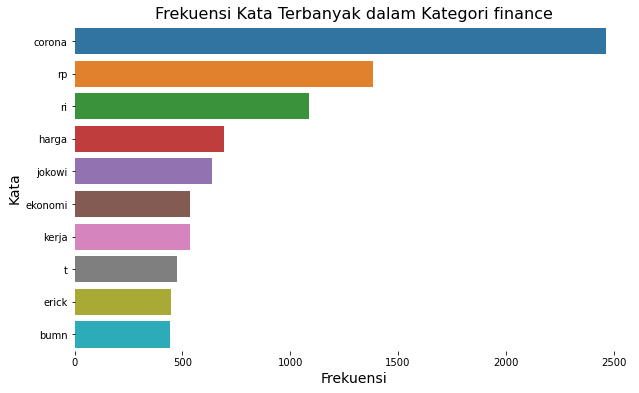

[('corona', 2465), ('rp', 1385), ('ri', 1087), ('harga', 691), ('jokowi', 638), ('ekonomi', 534), ('kerja', 534), ('t', 477), ('erick', 448), ('bumn', 441)]




In [ ]:
category = categories[0]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")

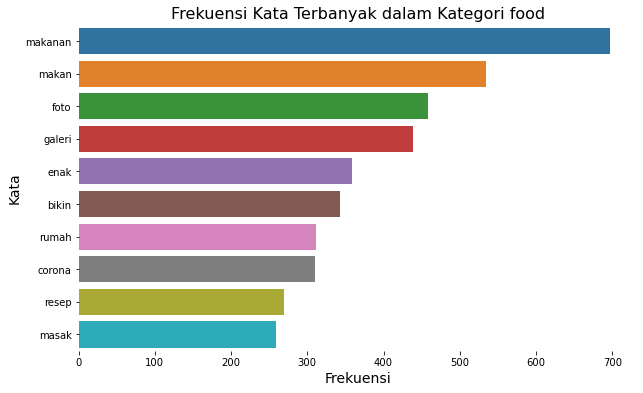

[('makanan', 697), ('makan', 534), ('foto', 458), ('galeri', 438), ('enak', 358), ('bikin', 343), ('rumah', 311), ('corona', 310), ('resep', 270), ('masak', 259)]




In [ ]:
category = categories[1]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")

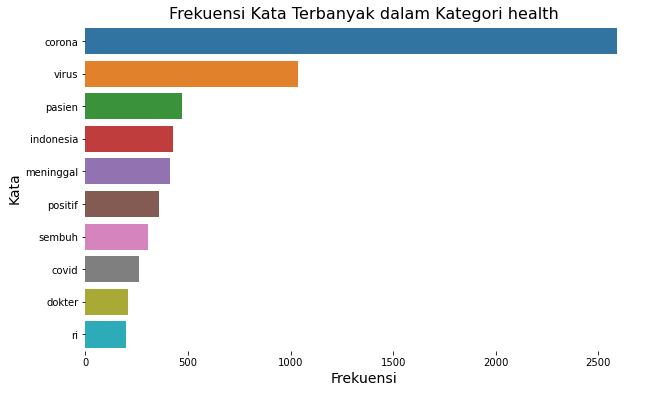

[('corona', 2589), ('virus', 1038), ('pasien', 471), ('indonesia', 427), ('meninggal', 412), ('positif', 360), ('sembuh', 306), ('covid', 262), ('dokter', 208), ('ri', 196)]




In [ ]:
category = categories[2]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")

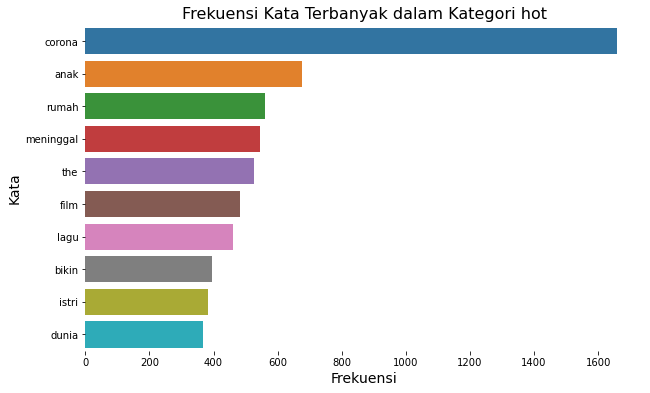

[('corona', 1658), ('anak', 675), ('rumah', 560), ('meninggal', 545), ('the', 527), ('film', 482), ('lagu', 461), ('bikin', 395), ('istri', 383), ('dunia', 368)]




In [ ]:
category = categories[3]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")

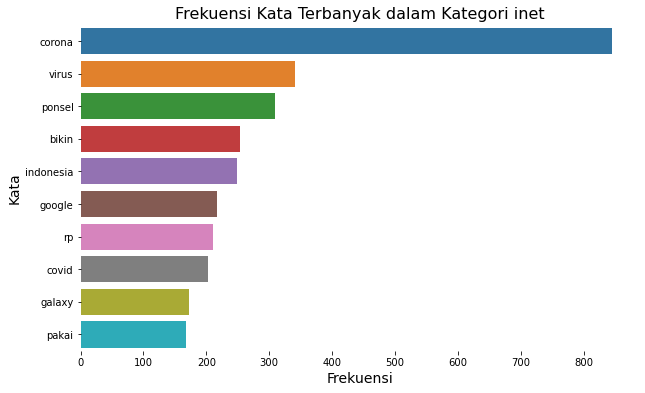

[('corona', 845), ('virus', 341), ('ponsel', 309), ('bikin', 253), ('indonesia', 248), ('google', 217), ('rp', 210), ('covid', 203), ('galaxy', 173), ('pakai', 168)]




In [ ]:
category = categories[4]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")

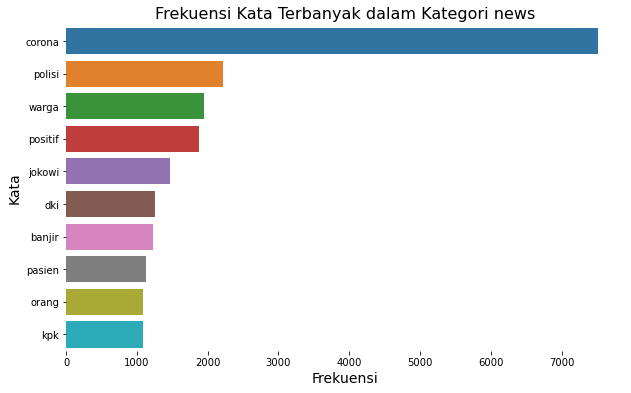

[('corona', 7508), ('polisi', 2221), ('warga', 1952), ('positif', 1874), ('jokowi', 1474), ('dki', 1262), ('banjir', 1225), ('pasien', 1134), ('orang', 1092), ('kpk', 1088)]




In [ ]:
category = categories[5]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")

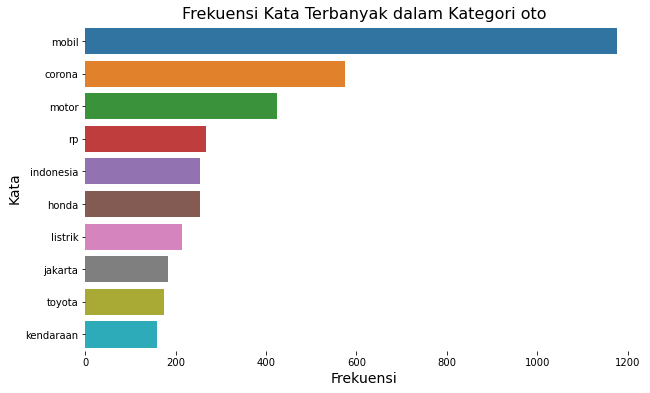

[('mobil', 1176), ('corona', 574), ('motor', 425), ('rp', 267), ('indonesia', 253), ('honda', 253), ('listrik', 215), ('jakarta', 182), ('toyota', 173), ('kendaraan', 159)]




In [ ]:
category = categories[6]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")

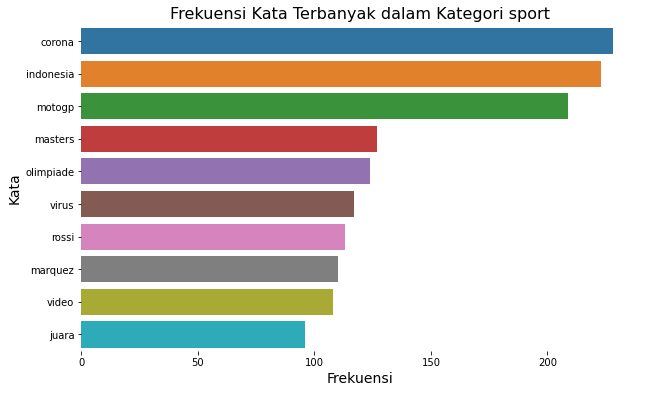

[('corona', 228), ('indonesia', 223), ('motogp', 209), ('masters', 127), ('olimpiade', 124), ('virus', 117), ('rossi', 113), ('marquez', 110), ('video', 108), ('juara', 96)]




In [ ]:
category = categories[7]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")

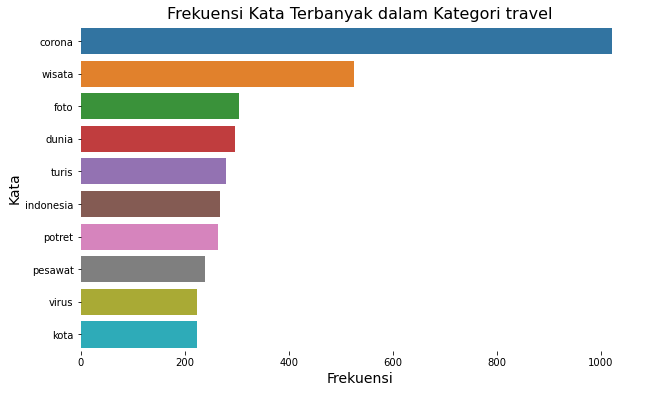

[('corona', 1021), ('wisata', 525), ('foto', 305), ('dunia', 297), ('turis', 280), ('indonesia', 267), ('potret', 264), ('pesawat', 240), ('virus', 224), ('kota', 223)]




In [ ]:
category = categories[8]
top_words = top_words_per_category(df, category, sw_indo)
plot_top_words(top_words, category)
print(top_words)
print("\n")